In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [13]:
Marketing=pd.read_csv("/Users/briannanero/Documents/Final Project/marketing_campaign.csv")

In [14]:
Marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
#data wrangling 
kidM = Marketing[['Kidhome','Teenhome','MntWines']]

In [16]:
kidM.head()


,Kidhome,Teenhome,MntWines
0,0,0,635
1,1,1,11
2,0,0,426
3,1,0,11
4,1,0,173


In [ ]:
#data exploration

In [41]:
len(kidM)

2240

In [42]:
len(kidM.columns)

5

In [44]:
kidM.MntWines.describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

In [45]:
kidM.mean()

Kidhome           0.444196
Teenhome          0.506250
MntWines        303.935714
MntWinesSQRT     14.301935
MntWinesLOG           -inf
dtype: float64

In [17]:
# Test assumption 

#Normality


/var/folders/62/7lvn0dks0ks66cs0665q24sc0000gn/T/ipykernel_21030/1652177990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidM['MntWines'])


<AxesSubplot: xlabel='MntWines', ylabel='Density'>

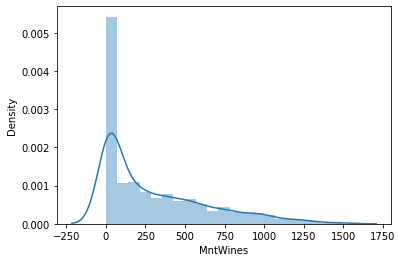

In [18]:
sns.distplot(kidM['MntWines'])

In [19]:
# Sqrt transformation

In [20]:
kidM['MntWinesSQRT']= np.sqrt(kidM['MntWines'])

/var/folders/62/7lvn0dks0ks66cs0665q24sc0000gn/T/ipykernel_21030/1194987102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidM['MntWinesSQRT']= np.sqrt(kidM['MntWines'])


In [21]:
kidM.head()

,Kidhome,Teenhome,MntWines,MntWinesSQRT
0,0,0,635,25.199206
1,1,1,11,3.316625
2,0,0,426,20.639767
3,1,0,11,3.316625
4,1,0,173,13.152946


/var/folders/62/7lvn0dks0ks66cs0665q24sc0000gn/T/ipykernel_21030/400224085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidM['MntWinesSQRT'])


<AxesSubplot: xlabel='MntWinesSQRT', ylabel='Density'>

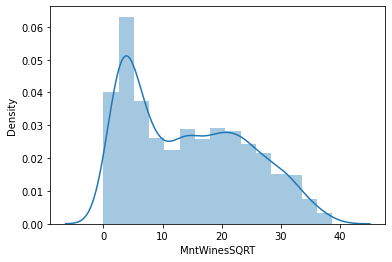

In [22]:
sns.distplot(kidM['MntWinesSQRT'])

In [23]:
#log transformation 

In [24]:
kidM['MntWinesLOG']= np.log(kidM['MntWines'])

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/62/7lvn0dks0ks66cs0665q24sc0000gn/T/ipykernel_21030/4138285482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidM['MntWinesLOG']= np.log(kidM['MntWines'])


In [25]:
kidM.head()

,Kidhome,Teenhome,MntWines,MntWinesSQRT,MntWinesLOG
0,0,0,635,25.199206,6.453625
1,1,1,11,3.316625,2.397895
2,0,0,426,20.639767,6.054439
3,1,0,11,3.316625,2.397895
4,1,0,173,13.152946,5.153292


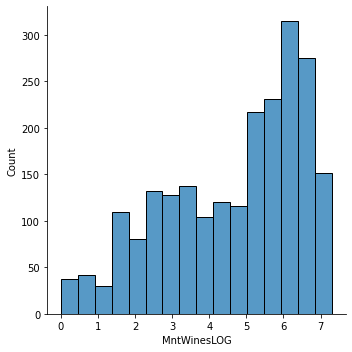

In [26]:
sns.displot(kidM['MntWinesLOG'])

In [27]:
#Homogeneity of Variance 

In [ ]:
#???? is this not running because of my import error or therecode?

In [ ]:
scipy.stats.fligner(kidM['MntWinesSQRT'], kidM['Kidhome'])

FlignerResult(statistic=2583.476436476546, pvalue=0.0)

In [30]:
#The p value is < .05
#violated the assumption of homogenity of variance 

In [31]:
scipy.stats.bartlett(kidM['MntWinesSQRT'], kidM['Kidhome'])

BartlettResult(statistic=9977.763862755497, pvalue=0.0)

In [32]:
#The p value associated with this test is < .05
#violated the assumption of homogeneity of variance

In [33]:
#Since data violated the assumption of homogenity the F statistic will be bias when large sample variances are associated with small group sizes
#the significance level will be underestimated

In [34]:
#Computing Post Hocs with Tukey's

In [35]:
postHoc = MultiComparison(kidM['MntWinesSQRT'],kidM['Kidhome'])
postHocResults=postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 -11.5993   0.0 -12.4293 -10.7693   True
     0      2 -12.3372   0.0 -15.1468  -9.5276   True
     1      2  -0.7379 0.814  -3.5695   2.0936  False
-----------------------------------------------------


In [36]:
postHoc = MultiComparison(kidM['MntWinesSQRT'],kidM['Teenhome'])
postHocResults=postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   1.2097 0.0127  0.2101 2.2093   True
     0      2   3.0758 0.0748 -0.2324 6.3841  False
     1      2   1.8661 0.3845 -1.4509 5.1832  False
---------------------------------------------------


In [37]:
kidM.groupby('Kidhome').mean()

,Teenhome,MntWines,MntWinesSQRT,MntWinesLOG
Kidhome,,,,
0,0.529776,451.173241,19.221563,NaN
1,0.464961,104.403782,7.622252,NaN
2,0.645833,74.791667,6.884328,3.332196


In [38]:
kidM.groupby('Teenhome').mean()

,Kidhome,MntWines,MntWinesSQRT,MntWinesLOG
Teenhome,,,,
0,0.463731,304.822971,13.674295,NaN
1,0.423301,300.009709,14.883975,4.943147
2,0.423077,361.942308,16.750110,5.226860


In [40]:
kidM.to_csv('/Users/briannanero/Documents/Final Project/data4tab.csv', index=False)